# COCO Statistics Exploration
This Jupyter notebook aims to explore the distribution of the objects in the COCO training dataset 2017.

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import multiprocessing
import numpy as np
from functools import partial
from matplotlib.patches import Rectangle
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
plt.rcParams['figure.figsize']=(10,10)
sns.set(context="talk")

In [2]:
# Define image directory
dataDir='.'
dataType='train2017'
annFile='{}/images/{}_selected/annotations/instances_{}.json'.format(dataDir,dataType,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=21.79s)
creating index...
index created!


In [3]:
# display COCO categories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

COCO categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush



In [4]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=cats)
imgIds = coco.getImgIds(catIds=catIds)
annIds = coco.getAnnIds(imgIds=imgIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [5]:
img = coco.loadImgs(imgIds[0])[0]
print(img)

{'height': 427, 'date_captured': '2013-11-20 02:07:55', 'id': 262145, 'width': 640, 'license': 2, 'coco_url': 'http://images.cocodataset.org/train2017/000000262145.jpg', 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg', 'file_name': '000000262145.jpg'}


In [6]:
print(anns[0])

{'iscrowd': 0, 'category_id': 28, 'bbox': [212.6, 55.62, 53.04, 53.46], 'area': 970.0430999999998, 'id': 284647, 'image_id': 262145, 'segmentation': [[214.27, 79.01, 220.54, 82.35, 235.99, 91.54, 247.69, 97.39, 255.2, 101.15, 265.64, 109.08, 261.89, 98.22, 256.04, 86.53, 248.94, 79.85, 244.76, 74.0, 237.66, 67.73, 232.23, 65.65, 228.89, 63.56, 231.4, 55.62, 229.31, 56.04, 226.38, 62.72, 220.12, 60.63, 215.94, 60.63, 214.27, 61.05, 218.87, 66.06, 216.36, 70.66, 212.6, 75.67, 212.6, 78.59]]}


In [7]:
print(len(imgIds))
print(len(anns))

118287
860001


## Build image data frame

In [8]:
import multiprocessing
import numpy as np
from functools import partial

def imgIds_to_df(imgIds_list):
    print('start chunk')
    df_temp = pd.DataFrame(columns=['image_id', 'file_name', 'coco_url', 'width', 'height'])
    for imgId in imgIds_list:
        img = coco.loadImgs(imgId)[0]
        df_temp = df_temp.append({
            'image_id': img['id'], 
            'file_name': img['file_name'], 
            'coco_url': img['coco_url'], 
            'width': img['width'], 
            'height': img['height']
        }, ignore_index=True)
    return df_temp

print('chunking in progress...')
imgIds_chunks = [imgIds[x:x+10000] for x in range(0, len(imgIds), 10000)]

print('multiprocessing in progress...')
optimal_thread_count = multiprocessing.cpu_count()
pool = multiprocessing.Pool(optimal_thread_count)
result_list = pool.map(imgIds_to_df, imgIds_chunks)
pool.close()
pool.join()

print('concatenating in progress...')
df_images = pd.concat(result_list)

chunking in progress...
multiprocessing in progress...
start chunkstart chunkstart chunk


start chunkstart chunk
start chunk
start chunk
start chunk

Process ForkPoolWorker-8:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._t

KeyboardInterrupt: 

In [ ]:
# convert data type
df_images['image_id'] = df_images['image_id'].astype(int)
df_images['file_name'] = df_images['file_name'].astype(str)
df_images['coco_url'] = df_images['coco_url'].astype(str)
df_images['width'] = df_images['width'].astype(float)
df_images['height'] = df_images['height'].astype(float)
df_images = df_images.sort_values(by=['image_id'])
df_images.reset_index()

In [14]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118287 entries, 0 to 118286
Data columns (total 5 columns):
image_id     118287 non-null int64
file_name    118287 non-null object
coco_url     118287 non-null object
width        118287 non-null float64
height       118287 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.5+ MB


In [15]:
df_images.head()

,image_id,file_name,coco_url,width,height
0,9,000000000009.jpg,http://images.cocodataset.org/train2017/000000...,640.0,480.0
1,25,000000000025.jpg,http://images.cocodataset.org/train2017/000000...,640.0,426.0
2,30,000000000030.jpg,http://images.cocodataset.org/train2017/000000...,640.0,428.0
3,34,000000000034.jpg,http://images.cocodataset.org/train2017/000000...,640.0,425.0
4,36,000000000036.jpg,http://images.cocodataset.org/train2017/000000...,481.0,640.0


In [12]:
df_images.to_csv('./images/train2017_selected/annotations/images_train2017.csv', header=True, index=False)

In [5]:
df_images = pd.read_csv('./images/train2017_selected/annotations/images_train2017.csv', header=0)

## Build object data frame

In [16]:
import multiprocessing
import numpy as np
from functools import partial

def anns_to_df(anns_list):
    print('start chunk')
    df_temp = pd.DataFrame(columns=['image_id', 'category_id', 
                                    'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h'])
    for ann in anns_list:
        df_temp = df_temp.append({
            'image_id':     ann['image_id'], 
            'category_id':  ann['category_id'], 
            'bbox_x':       ann['bbox'][0], 
            'bbox_y':       ann['bbox'][1], 
            'bbox_w':       ann['bbox'][2],
            'bbox_h':       ann['bbox'][3]
        }, ignore_index=True)
    return df_temp

print('chunking in progress...')
anns_chunks = [anns[x:x+100000] for x in range(0, len(anns), 100000)]

print('multiprocessing in progress...')
optimal_thread_count = multiprocessing.cpu_count()
pool = multiprocessing.Pool(optimal_thread_count)
result_list = pool.map(anns_to_df, anns_chunks)
pool.close()
pool.join()

print('concatenating in progress...')
df_objects = pd.concat(result_list)

chunking in progress...
multiprocessing in progress...
start chunk
start chunk
start chunk
start chunk
start chunk
start chunk
start chunk
start chunk
start chunk
concatenating in progress...


In [17]:
# convert data type
df_objects['image_id'] = df_objects['image_id'].astype(int)
df_objects['category_id'] = df_objects['category_id'].astype(int)
df_objects['bbox_x'] = df_objects['bbox_x'].astype(float)
df_objects['bbox_y'] = df_objects['bbox_y'].astype(float)
df_objects['bbox_w'] = df_objects['bbox_w'].astype(float)
df_objects['bbox_h'] = df_objects['bbox_h'].astype(float)
df_objects = df_objects.sort_values(by=['image_id', 'category_id'])
df_objects.reset_index()

,index,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h
0,237,9,51,1.08,187.69,611.59,285.84
1,238,9,51,311.73,4.31,319.28,228.68
2,240,9,51,0.00,13.51,434.48,375.12
3,241,9,55,376.20,40.36,75.55,46.53
4,242,9,55,465.78,38.97,58.07,46.67
...,...,...,...,...,...,...,...
859996,26528,581913,60,224.16,4.21,260.39,192.14
859997,26534,581921,1,165.04,7.68,213.98,220.69
859998,26535,581921,36,275.31,159.60,41.26,106.69
859999,26548,581929,19,243.88,162.92,203.14,176.01


In [18]:
df_objects['center_x'] = df_objects['bbox_x'] + df_objects['bbox_w'] / 2.
df_objects['center_y'] = df_objects['bbox_y'] + df_objects['bbox_h'] / 2.

In [30]:
# Get associated category name
catLblFile='{}/images/train2017_selected/annotations/coco-labels-paper.txt'.format(dataDir)
f = open(catLblFile, "r")
category_name = list()
for cat in f:
    category_name.append(cat)
cat_dict = {float(i): category_name[i - 1] for i in range(1, len(category_name)+1)}
df_objects['category_name'] = df_objects['category_id'].map(cat_dict)
df_objects['category_name'] = df_objects['category_name'].str.strip('\n')

In [35]:
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860001 entries, 0 to 860000
Data columns (total 9 columns):
image_id         860001 non-null int64
category_id      860001 non-null int64
bbox_x           860001 non-null float64
bbox_y           860001 non-null float64
bbox_w           860001 non-null float64
bbox_h           860001 non-null float64
center_x         860001 non-null float64
center_y         860001 non-null float64
category_name    860001 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 59.1+ MB


In [32]:
df_objects.head()

,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h,center_x,center_y,category_name
0,9,51,1.08,187.69,611.59,285.84,306.875,330.610,bowl
1,9,51,311.73,4.31,319.28,228.68,471.370,118.650,bowl
2,9,51,0.00,13.51,434.48,375.12,217.240,201.070,bowl
3,9,55,376.20,40.36,75.55,46.53,413.975,63.625,orange
4,9,55,465.78,38.97,58.07,46.67,494.815,62.305,orange


In [33]:
df_objects.to_csv('./images/train2017_selected/annotations/objects_train2017.csv', header=True, index=False)

In [6]:
df_objects = pd.read_csv('./images/train2017_selected/annotations/objects_train2017.csv', header=0)

In [10]:
print(df_objects['category_id'].unique())

[51 55 56 25 64 86 24  1 28 18 19 22  3  8 13 85  7  4  2 41  5 31 49 78
 79 84 48 61 15 47 59 62 67 50 65 88 81 82 44 52 54 16 38 46 32 87 39 57
 36 90 63 75 10 27  6 33 34 58 77 40 37 35 73 74  9 43 60 17 23 70 72 53
 42 76 20 14 11 21 80 89]


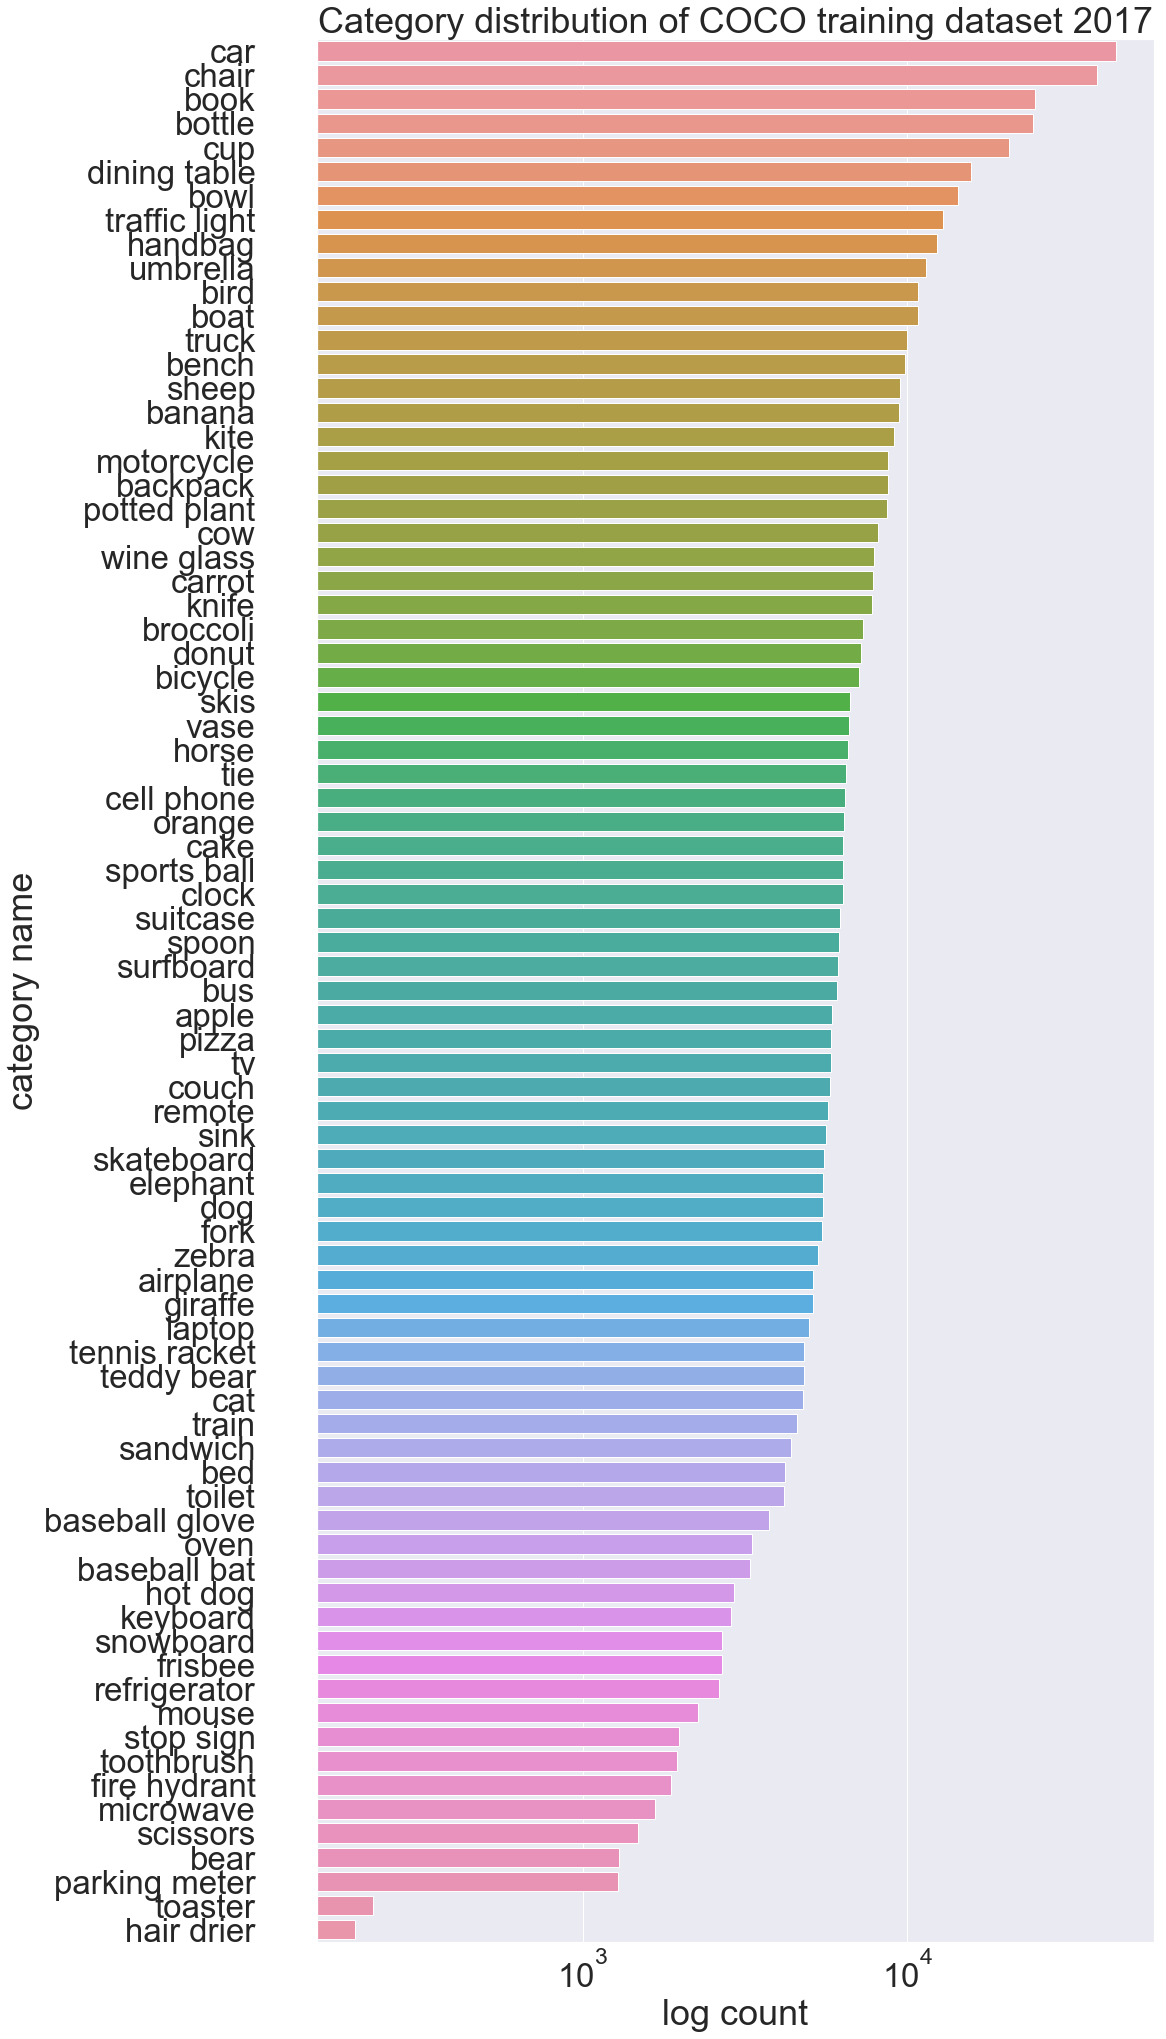

In [33]:
# ax = sns.countplot(x="category_name", data=df_objects)
plt.rcParams['figure.figsize']=(15,35)
ax = sns.countplot(
    y="category_name", 
    data=df_objects[df_objects["category_name"]!="person"],
    order=df_objects[df_objects["category_name"]!="person"]['category_name'].value_counts().index)
sns.set(font_scale = 3)
ax.set_xscale("log")
ax.tick_params(axis='y', which='major', pad=55)
plt.ylabel("category name")
plt.xlabel("log count")
plt.title("Category distribution of COCO training dataset 2017")
plt.show()

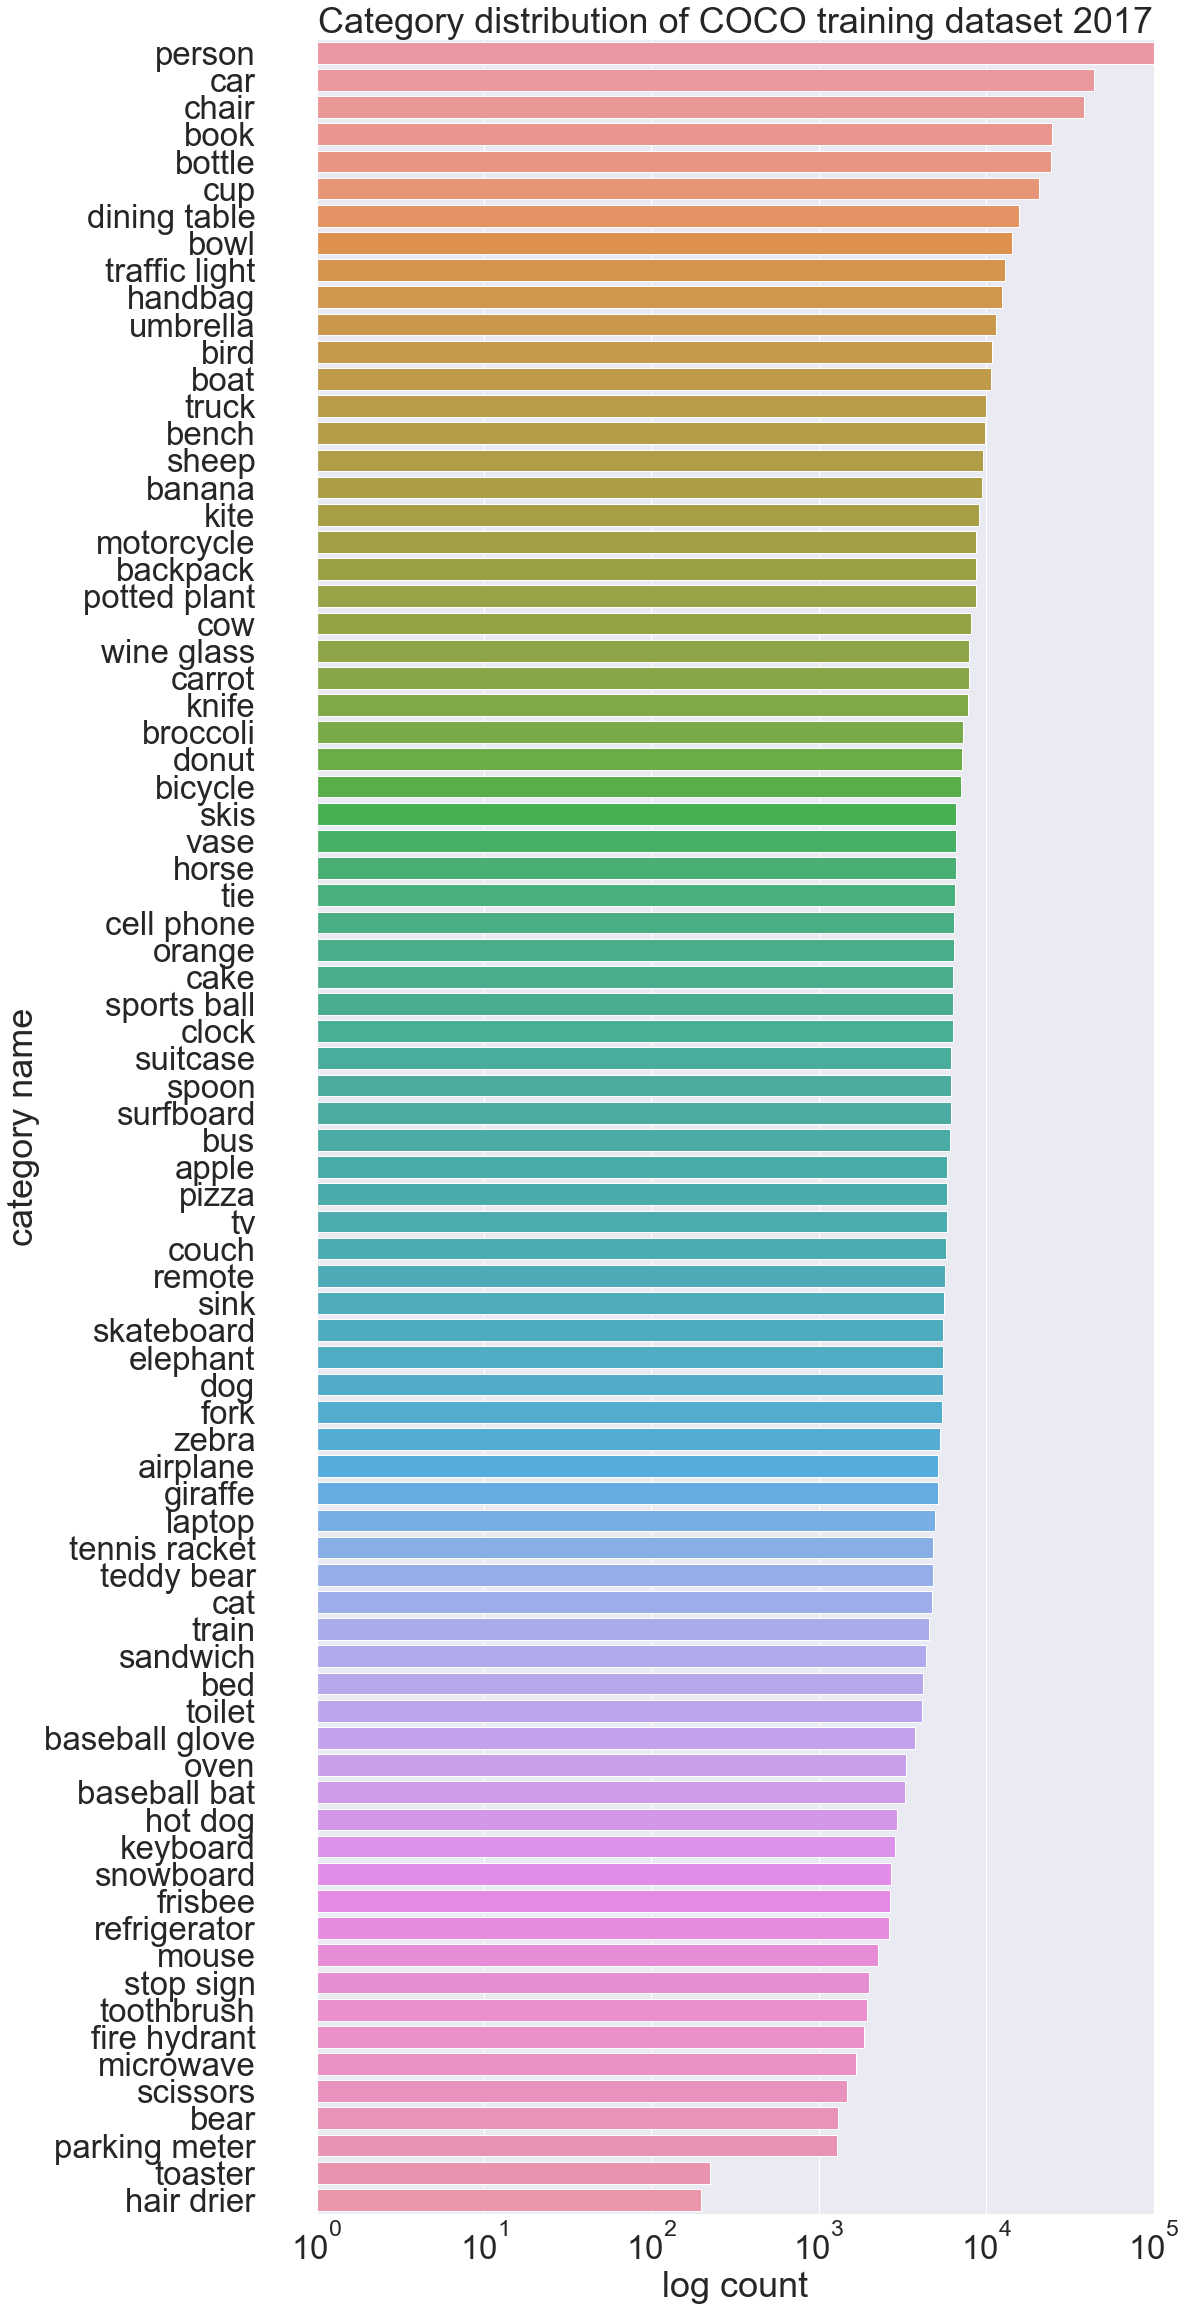

In [38]:
plt.rcParams['figure.figsize']=(15,40)
ax = sns.countplot(
    y="category_name", 
    data=df_objects,
    order=df_objects['category_name'].value_counts().index)
sns.set(font_scale = 3)
ax.set_xscale("log")
ax.tick_params(axis='y', which='major', pad=55)
plt.ylabel("category name")
plt.xlabel("log count")
plt.xlim(1e0,1e5)
plt.title("Category distribution of COCO training dataset 2017")
plt.show()

## Join df_images and df_objects via image_id

In [7]:
df = pd.merge(df_images, df_objects, on='image_id', how='left')
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860001 entries, 0 to 861021
Data columns (total 13 columns):
image_id         860001 non-null int64
file_name        860001 non-null object
coco_url         860001 non-null object
width            860001 non-null float64
height           860001 non-null float64
category_id      860001 non-null float64
bbox_x           860001 non-null float64
bbox_y           860001 non-null float64
bbox_w           860001 non-null float64
bbox_h           860001 non-null float64
center_x         860001 non-null float64
center_y         860001 non-null float64
category_name    860001 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 91.9+ MB


## Visualize distribution of objects' center points

In [8]:
max_width = df_images['width'].max()
max_height = df_images['height'].max()

In [9]:
print(max_width, max_height)

640.0 640.0


In [10]:
def transform_coordinate(image_size, original_point, new_size):
    max_w, max_h = new_size
    image_w, image_h = image_size
    original_x, original_y = original_point
    offset_x = (max_w - image_w) / 2
    offset_y = (max_h - image_h) / 2
    return (offset_x + original_x), (offset_y + image_h - original_y)

def convert(df_to_convert):
    print(".", end="")
    df_temp = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'x_center', 'y_center', 'cat_id', 'cat_name'])
    for index, entry in df_to_convert.iterrows():
        image_size = (entry['width'], entry['height'])
        bbox_centerpoint = (entry['center_x'], entry['center_y'])
        bbox_xy = (entry['bbox_x'], entry['bbox_y'])
        new_bbox_x_center, new_bbox_y_center = transform_coordinate(image_size, bbox_centerpoint, (max_width, max_height))
        new_bbox_x, new_bbox_y = transform_coordinate(image_size, bbox_xy, (max_width, max_height))
        df_temp = df_temp.append({
            'x': new_bbox_x, 'y': new_bbox_y, 'w': entry['bbox_w'], 'h': entry['bbox_h'],
            'x_center': new_bbox_x_center, 'y_center': new_bbox_y_center,
            'cat_id': entry['category_id'],
            'cat_name': entry['category_name']
            }, ignore_index=True)
    return df_temp

print('chunking in progress...')
split_set = np.array_split(df, 7)

print('multiprocessing in progress...')
optimal_thread_count = multiprocessing.cpu_count()
pool = multiprocessing.Pool(optimal_thread_count)
result_list = pool.map(convert, split_set)
pool.close()
pool.join()

print('concatenating in progress...')
df_graph = pd.concat(result_list)


chunking in progress...
multiprocessing in progress...
.......concatenating in progress...


In [11]:
df_graph.head()

,x,y,w,h,x_center,y_center,cat_id,cat_name
0,1.08,372.31,611.59,285.84,306.875,229.390,51.0,bowl
1,311.73,555.69,319.28,228.68,471.370,441.350,51.0,bowl
2,0.00,546.49,434.48,375.12,217.240,358.930,51.0,bowl
3,376.20,519.64,75.55,46.53,413.975,496.375,55.0,orange
4,465.78,521.03,58.07,46.67,494.815,497.695,55.0,orange


In [12]:
df_graph.to_csv('./images/train2017_selected/annotations/viz_train2017.csv', header=True, index=False)

In [10]:
df_graph = pd.read_csv('./images/train2017_selected/annotations/viz_train2017.csv', header=0)

In [28]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860001 entries, 0 to 860000
Data columns (total 8 columns):
x           860001 non-null float64
y           860001 non-null float64
w           860001 non-null float64
h           860001 non-null float64
x_center    860001 non-null float64
y_center    860001 non-null float64
cat_id      860001 non-null float64
cat_name    860001 non-null object
dtypes: float64(7), object(1)
memory usage: 52.5+ MB


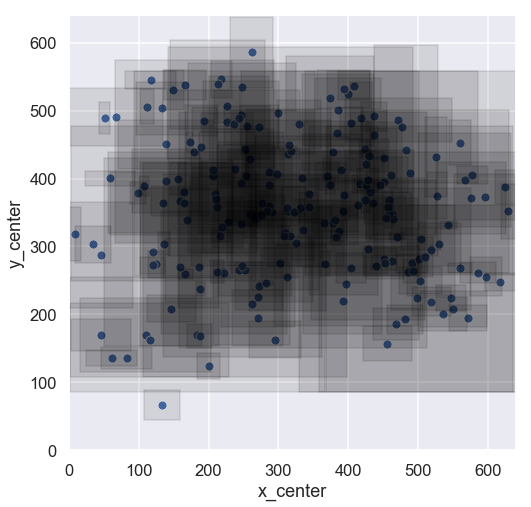

In [14]:
df_graph_filtered = df_graph[df_graph['cat_name']=='hair drier']
ax = sns.scatterplot(x='x_center', y='y_center', data=df_graph_filtered)
for index, row in df_graph_filtered.iterrows():
    # create the shape
    rect = Rectangle((row["x"], row["y"]), row["w"], -row["h"], fill=True, color='black', alpha=0.1)
    # draw the box
    ax.add_patch(rect)
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(0, max_width)
plt.ylim(0, max_height)
plt.show()

## Rescale image to max_width x max_height

In [18]:
def transform_rescale_coordinate(image_size, original_point, new_size):
    max_w, max_h = new_size
    image_w, image_h = image_size
    original_x, original_y = original_point
    new_x = (original_x/image_w)*max_w
    new_y = ((image_h-original_y)/image_h)*max_h
    return new_x, new_y

def transform_rescale_bboxsize(image_size, bboxsize, new_size):
    max_w, max_h = new_size
    bbox_w, bbox_h = bboxsize
    image_w, image_h = image_size
    new_w = (bbox_w/image_w)*max_w
    new_h = (bbox_h/image_h)*max_h
    return new_w, new_h

In [19]:
def convert(df_to_convert):
    print(".", end="")
    df_temp = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'x_center', 'y_center', 'cat_id', 'cat_name'])
    for index, entry in df_to_convert.iterrows():
        image_size = (entry['width'], entry['height'])
        bbox_centerpoint = (entry['center_x'], entry['center_y'])
        bbox_xy = (entry['bbox_x'], entry['bbox_y'])
        bbox_wh = (entry['bbox_w'], entry['bbox_h'])
        new_bbox_x_center, new_bbox_y_center = transform_rescale_coordinate(image_size, bbox_centerpoint, (max_width, max_height))
        new_bbox_x, new_bbox_y = transform_rescale_coordinate(image_size, bbox_xy, (max_width, max_height))
        new_bbox_w, new_bbox_h = transform_rescale_bboxsize(image_size, bbox_wh, (max_width, max_height))
        df_temp = df_temp.append({
            'x': new_bbox_x, 'y': new_bbox_y, 'w': new_bbox_w, 'h': new_bbox_h,
            'x_center': new_bbox_x_center, 'y_center': new_bbox_y_center,
            'cat_id': entry['category_id'],
            'cat_name': entry['category_name']
            }, ignore_index=True)
    return df_temp

print('chunking in progress...')
split_set = np.array_split(df, 14)

print('multiprocessing in progress...')
optimal_thread_count = multiprocessing.cpu_count()
pool = multiprocessing.Pool(optimal_thread_count)
result_list = pool.map(convert, split_set)
pool.close()
pool.join()

print('concatenating in progress...')
df_viz = pd.concat(result_list)

chunking in progress...
multiprocessing in progress...
..............concatenating in progress...


In [20]:
df_viz.to_csv('./images/train2017_selected/annotations/viz_train2017.csv', header=True, index=False)

In [11]:
df_viz = pd.read_csv('./images/train2017_selected/annotations/viz_train2017.csv', header=0)

In [22]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860001 entries, 0 to 122856
Data columns (total 8 columns):
x           860001 non-null float64
y           860001 non-null float64
w           860001 non-null float64
h           860001 non-null float64
x_center    860001 non-null float64
y_center    860001 non-null float64
cat_id      860001 non-null float64
cat_name    860001 non-null object
dtypes: float64(7), object(1)
memory usage: 59.1+ MB


In [ ]:
# Plot objects' center points
sns.scatterplot(x='x_center', y='y_center', data=df_viz, hue='cat_name', legend=None)
plt.rcParams['figure.figsize']=(20,20)
plt.xlim(0, max_width)
plt.ylim(0, max_height)
plt.show()

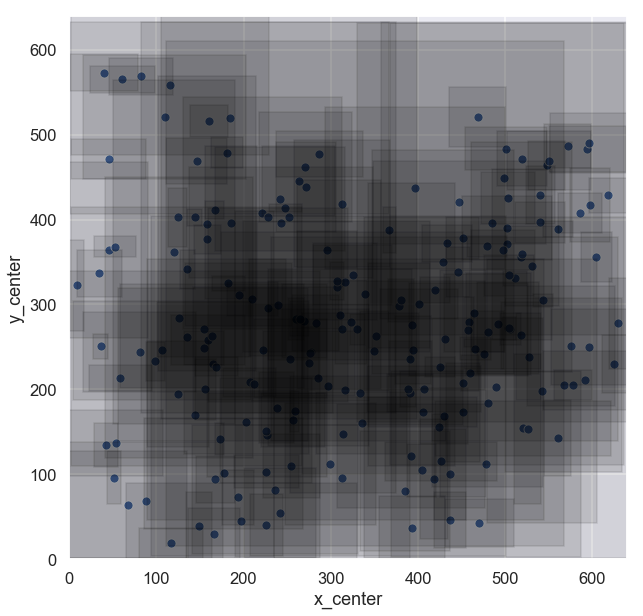

In [26]:
df_viz_filtered = df_viz[df_viz['cat_name']=='hair drier']
ax = sns.scatterplot(x='x_center', y='y_center', data=df_viz_filtered)
for index, row in df_viz_filtered.iterrows():
    # create the shape
    rect = Rectangle((row["x"], row["y"]), row["w"], -row["h"], fill=True, color='black', alpha=0.1)
    # draw the box
    ax.add_patch(rect)
plt.rcParams['figure.figsize']=(10,10)
plt.xlim(0, max_width)
plt.ylim(0, max_height)
plt.show()

## Automate visualizing object distribution

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


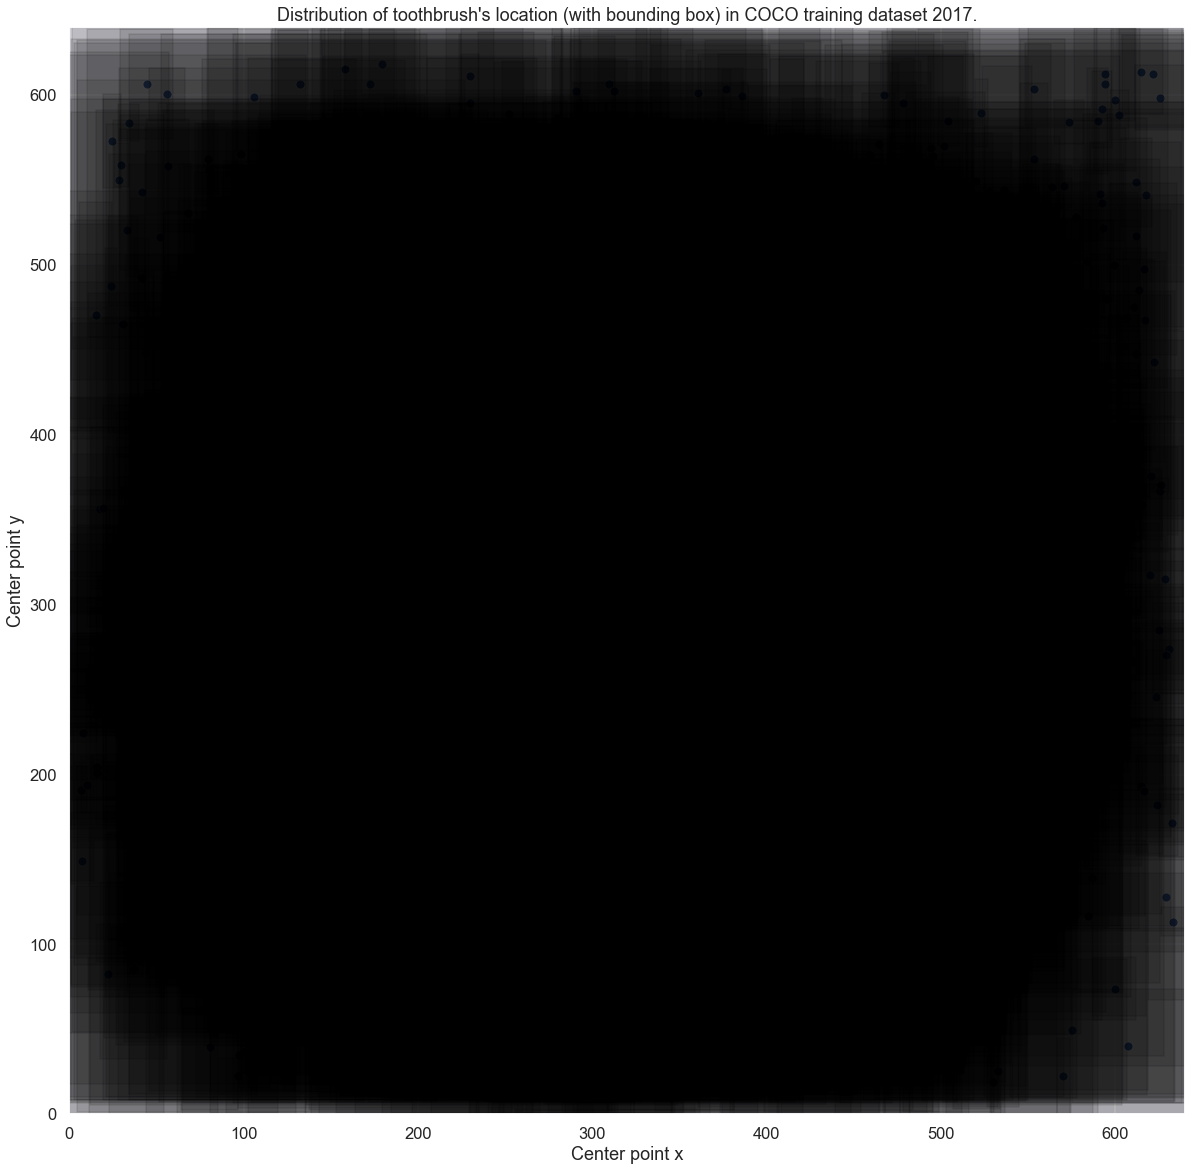

In [22]:
for cat in cats:
    plt.clf()
    cat_name = cat['name']
    print(cat_name)
    df_viz_filtered = df_viz[df_viz['cat_name']==cat_name]
    ax = sns.scatterplot(x='x_center', y='y_center', data=df_viz_filtered)
    for index, row in df_viz_filtered.iterrows():
        # create the shape
        rect = Rectangle((row["x"], row["y"]), row["w"], -row["h"], fill=True, color='black', alpha=0.1)
        # draw the box
        ax.add_patch(rect)
    plt.rcParams['figure.figsize']=(8,8)
    plt.xlim(0, max_width)
    plt.ylim(0, max_height)
    plt.title("Distribution of "+cat_name+"'s location (with bounding box) in COCO training dataset 2017.")
    plt.xlabel("Center point x")
    plt.ylabel("Center point y")
    plt.savefig("./images/train2017_object_distribution/" + cat_name + '.png')
    # plt.show()

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


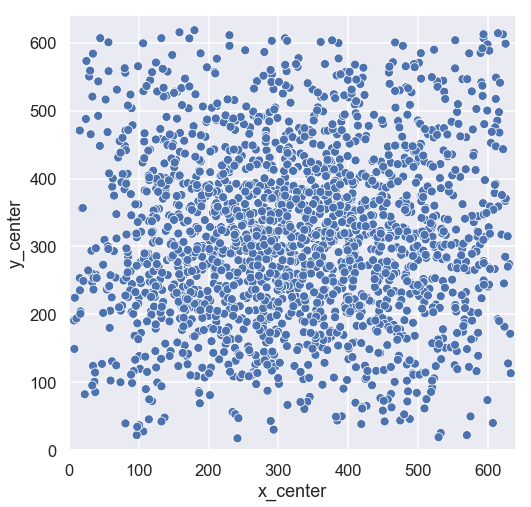

In [21]:
for cat in cats:
    plt.clf()
    cat_name = cat['name']
    print(cat_name)
    sns.scatterplot(x='x_center', y='y_center', data=df_viz[df_viz['cat_name']==cat_name], hue='cat_name', legend=None)
    plt.rcParams['figure.figsize']=(20,20)
    plt.xlim(0, max_width)
    plt.ylim(0, max_height)
    plt.savefig("./images/train2017_object_distribution/_" + cat_name + '.png')
    # plt.show()